## <div align="center">Fixed Point and Floating Point </div>

Table of contents:
1. Introduction
2. Experiment with a signal
3. Experiment with a low-pass(FIR) filter
4. Conclsuion

## <div align="center">Part 1. Introduction. </div>

bla bla bla bla

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from FixedPoint import FXnum, FXfamily
import math
import time


## <div align="center">Part 2. Experiment with a signal. </div>

# I just did this section for understanding, maybe we can use it.

### Introduction of the idea..

bla bla bla

In [2]:
# Set uo conditions for FIXED-POINT
try1 = FXfamily(n_bits=6, n_intbits=16)
x1 = np.pi
x2 = try1.pi

print("Normal Python pi: ", x1)
print("Fixed point pi:   ",x2)

print(try1(300))

Normal Python pi:  3.141592653589793
Fixed point pi:    3.1406
300


In [3]:
# Create cosinus for plotting in FIXED point library

timestamps = np.arange(-8, 8, 0.1)
timestamps_ar = [] 
for i in timestamps:
    z = try1(i)*try1.pi*0.5
    timestamps_ar.append(z.cos())
    
print("Show element 11 of the array: ", timestamps_ar[11])
print(type(timestamps_ar[11]))

Show element 11 of the array:  -0.0937
<class 'FixedPoint.FXnum'>


In [4]:
# Create cos for plotting in Standard Python 

timestamps = np.arange(-8, 8, 0.1)
timestamps_ar_np = [] 
for i in timestamps:
    z = i*np.pi*0.5
    timestamps_ar_np.append(np.cos(z))
    
print("Show element 11 of the array: ", timestamps_ar_np[11])
print(type(timestamps_ar_np[11]))

Show element 11 of the array:  -0.15643446504022512
<class 'numpy.float64'>


### Plot both Cosinus and zoom in

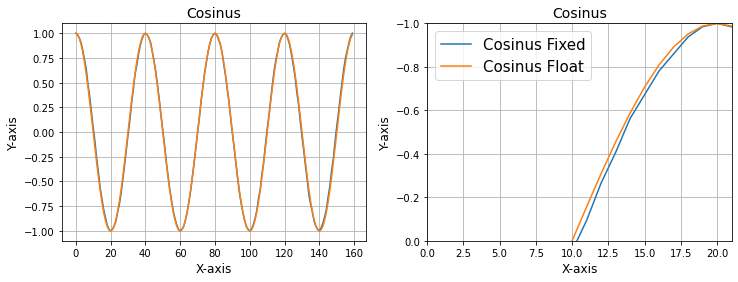

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(timestamps_ar)
ax[0].plot(timestamps_ar_np)
ax[0].set_title('Cosinus', fontsize=14)
ax[0].set_xlabel('X-axis', fontsize=12)
ax[0].set_ylabel('Y-axis', fontsize=12)
ax[0].grid(True)

ax[1].plot(timestamps_ar, label="Cosinus Fixed")
ax[1].plot(timestamps_ar_np, label="Cosinus Float")
ax[1].set_title('Cosinus', fontsize=14)
ax[1].set_xlabel('X-axis', fontsize=12)
ax[1].set_ylabel('Y-axis', fontsize=12)
ax[1].set_xlim([0, 21])
ax[1].set_ylim([0.0, -1.0])
ax[1].legend()
ax[1].legend(fontsize=15)
ax[1].grid(True)



### Conclusion

bla bla bla bla

## <div align="center">Part 3. Experiment with a low-pass(FIR) filter. </div>

### Introduction of the idea..

bla bla bla

<img src="pseudocode.png" alt="Alt text" width="500" height="300" align="center">

Source:
- https://stackoverflow.com/questions/62448904/how-to-implement-continuous-time-high-low-pass-filter-in-python
- https://en.wikipedia.org/wiki/Low-pass_filter
- https://helpful.knobs-dials.com/index.php/Low-pass_filter

In [6]:
# Function for plotting signal
def plot_signal(t, original, filtered, title):
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    # Plot original and filtered signal
    ax[0].plot(t, original, label='Original Signal')
    ax[0].plot(t, filtered, label='Filtered Signal', linewidth = 3)
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title(f"{title} Original", fontsize=15)
    ax[0].legend()
    ax[0].legend(fontsize=15)
    ax[0].grid(True)


    ax[1].plot(t, original, label='Original Signal')
    ax[1].plot(t, filtered, label='Filtered Signal', linewidth = 3)
    ax[1].set_xlabel('Time (s)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title(f"{title} Filtered", fontsize=15)
    ax[1].set_xlim([9, 11])
    ax[1].legend()
    ax[1].legend(fontsize=15)
    ax[1].grid(True)
    
    # Adjust the size of the subplots
    ax[0].set_position([0, 0, 0.67, 1])
    ax[1].set_position([0.7,0, 0.3, 1])
#     print("Execution time:", execution_time)

### FLOATING POINT

In [7]:
# FIR filter for #f2-16bit , f4-32bit, f8-64bit, f16-128bit
def filter_signal_floating(bits): 
    start_time = time.time()
    err = []
    
    # Define filter coefficients
    
    if bits == 64: # If 64 bits
        RC = np.float64(1/(2 * math.pi * 2))
        dt = 0.01  # Sampling interval
        alpha = np.float64((dt / (RC + dt)))

        # Define input signal
        t = []
        x = []
        for i in range(1000):
            t.append(i*dt)
            sig = math.cos(2*math.pi*0.5*t[i]) + 0.2*math.sin(2*math.pi*2.5*t[i]+0.1) + 0.2*math.sin(2*math.pi*15.3*t[i])
            x.append(np.float64(sig))
            
    else: # all other conditions
        RC = 1/(2 * math.pi * 2)  # Time constant for the filter
        dt = 0.01  # Sampling interval
        alpha = dt / (RC + dt)

        # Define input signal
        t = []
        x = []
        for i in range(1000):
            t.append(i*dt)
            sig = math.cos(2*math.pi*0.5*t[i]) + 0.2*math.sin(2*math.pi*2.5*t[i]+0.1) + 0.2*math.sin(2*math.pi*15.3*t[i])
            x.append(sig)

    # Apply the filter to the input signal
    filtered_signal = []
    previous_value = 0
    for i in range(1000):
        filtered_value = alpha * x[i] + (1 - alpha) * previous_value
        filtered_signal.append(filtered_value)
        previous_value = filtered_value
        error = x2[i] - filtered_value
        err.append(error)

    end_time = time.time()
    execution_time1 = end_time - start_time
    
    return t, x, filtered_signal, execution_time1, err

### FIXED POINT

### Version 1.0 - Conver into FIXED point only a signal

In [8]:
# Give parameters to FIXED point
def filter_signal_fixed(n_bits,n_intbits):
    start_time2 = time.time()

    # Create cosinus for plotting in FIXED point library
#     try1 = FXfamily(n_bits=8, n_intbits=12)
    try1 = FXfamily(n_bits=n_bits, n_intbits=n_intbits)

    # Define filter coefficients
    RC2 = 1/(2 * math.pi * 2)  # Time constant for the filter
    dt2 = 0.01  # Sampling interval
    alpha2 = dt2 / (RC2 + dt2)
    err = []


    # Define input signal
    t2 = []
    x2 = []
    for i in range(1000):
        t2.append(i*dt2)
        sig = math.cos(2*math.pi*0.5*t2[i]) + 0.2*math.sin(2*math.pi*2.5*t2[i]+0.1) + 0.2*math.sin(2*math.pi*15.3*t2[i])
        x2.append(FXnum(sig, try1))

    end_time2 = time.time()
    execution_time2 = end_time2 - start_time2

    # Apply the filter to the input signal
    filtered_signal_2 = []
    previous_value2 = 0
    for i in range(1000):
        filtered_value = alpha2 * x2[i] + (1 - alpha2) * previous_value2
        filtered_signal_2.append(filtered_value)
        previous_value2 = filtered_value
        error = x2[i] - filtered_value
        err.append(error)
        
    
        
    return t2, x2, filtered_signal_2, execution_time2,  err
        
        

### Version 1.0 - Conver into FIXED point every number in the algorithm

In [9]:
# # Give parameters to FIXED point
# def filter_signal_fixed(n_bits,n_intbits):
#     start_time2 = time.time()

#     # Create cosinus for plotting in FIXED point library
# #     try1 = FXfamily(n_bits=8, n_intbits=12)
#     try1 = FXfamily(n_bits=n_bits, n_intbits=n_intbits)

#     # Define filter coefficients
#     RC2 = try1(1)/(try1(2) * try1.pi * try1(2))  # Time constant for the filter
#     dt2 = try1(0.01)  # Sampling interval
#     alpha2 = dt2 / (RC2 + dt2)
#     err = []


#     # Define input signal
#     t2 = []
#     x2 = []
#     for i in range(1000):
#         t2.append(try1(i)*dt2)

#         z = try1(2)*try1.pi*try1(0.5)*try1(t2[i])
#         w = try1(2)*try1.pi*try1(2.5)*try1(t2[i])+try1(0.1)
#         q = try1(2)*try1.pi*try1(15.3)*try1(t2[i])
#         prod = z.cos()+try1(0.2)*w.sin()+try1(0.2)*q.sin()
#         x2.append(prod)

#     end_time2 = time.time()
#     execution_time2 = end_time2 - start_time2

#     # Apply the filter to the input signal
#     filtered_signal_2 = []
#     previous_value2 = 0
#     for i in range(1000):
#         filtered_value = try1(alpha2) * try1(x2[i]) + (try1(1) - try1(alpha2)) * try1(previous_value2)
#         filtered_signal_2.append(try1(filtered_value))
#         previous_value2 = try1(filtered_value)
#         error = x2[i] - filtered_value
#         err.append(error)
        
    
        
#     return t2, x2, filtered_signal_2, execution_time2,  err
        
        

## RESULTS:

1000
1000
Execution time fixed point: 0.004240751266479492
Execution time fixed point: 0.0022430419921875
Execution time floating point: 0.005816936492919922
Execution time floating point: 0.05989694595336914


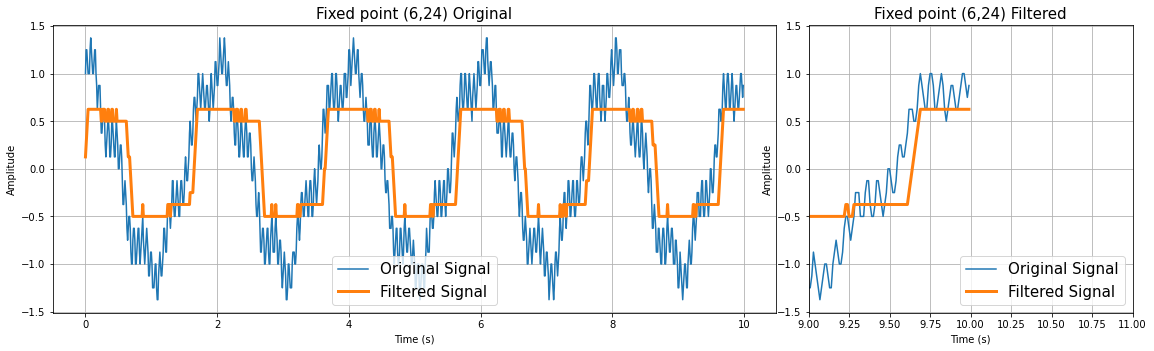

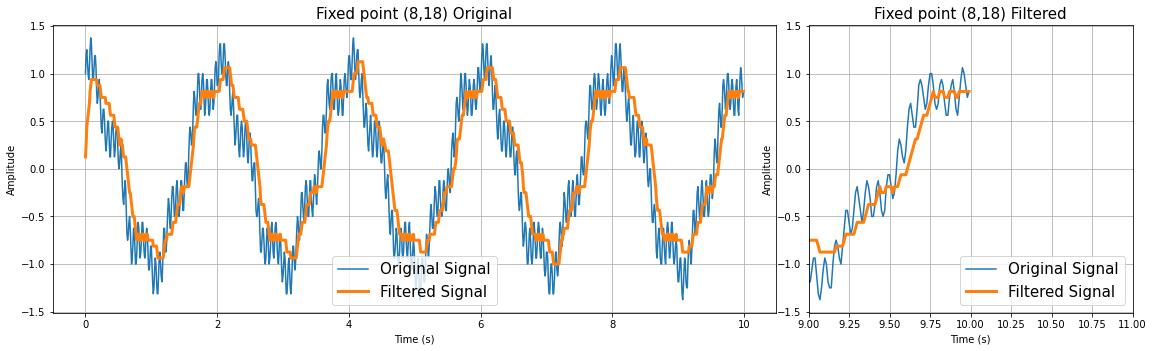

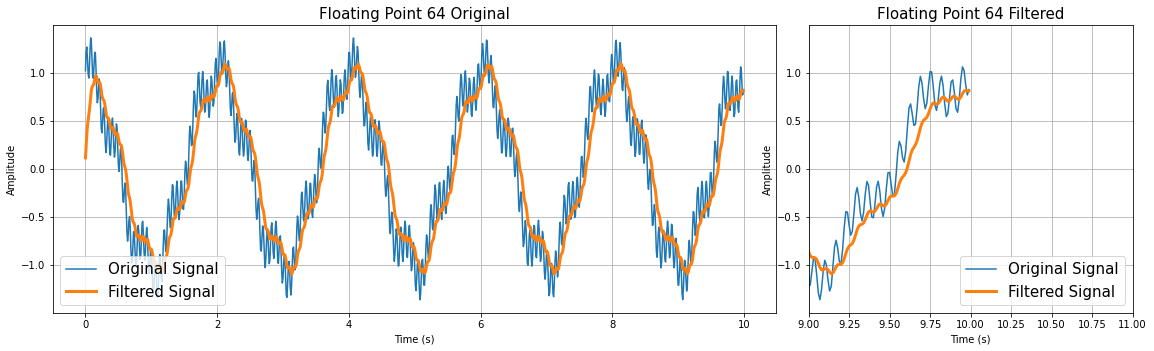

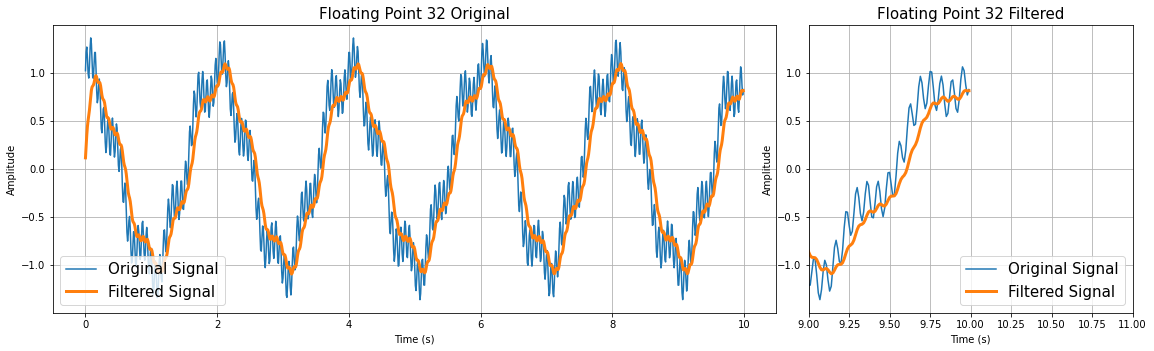

In [14]:
# t1, x1, filtered_signal_1, execution_time1, err1 = filter_signal_fixed(6,24)
# t1, x1, filtered_signal_1, execution_time1, err1 = filter_signal_fixed(6,18)
t1, x1, filtered_signal_1, execution_time1, err1 = filter_signal_fixed(3,3)
plot_signal(t1, x1, filtered_signal_1, "Fixed point (6,24)")
print(len(x1))
print(len(filtered_signal_1))

t2, x2, filtered_signal_2, execution_time2, err2 = filter_signal_fixed(4,2)
plot_signal(t2, x2, filtered_signal_2, "Fixed point (8,18)")

t3, x3, filtered_signal3, execution_time3, err3 = filter_signal_floating(64)
plot_signal(t3, x3, filtered_signal3, "Floating Point 64")

t, x, filtered_signal, execution_time, err4 = filter_signal_floating(32)
plot_signal(t, x, filtered_signal, "Floating Point 32")

print("Execution time fixed point:", execution_time1)
print("Execution time fixed point:", execution_time2)
print("Execution time floating point:", execution_time3)
print("Execution time floating point:", execution_time)

In [11]:
for sig_1, sig_2, sig_3, sig_4 in zip(filtered_signal_1, filtered_signal_2, filtered_signal3, filtered_signal):
    print(f"Fixed 1: {sig_1}, Fixed 2: {sig_2}, Floating 64: {sig_3}, Floating 32: {sig_4}")
    print("")

Fixed 1: 0.12, Fixed 2: 0.125, Floating 64: 0.11386419662517336, Floating 32: 0.11386419662517336

Fixed 1: 0.25, Fixed 2: 0.25, Floating 64: 0.23671698715382233, Floating 32: 0.23671698715382233

Fixed 1: 0.37, Fixed 2: 0.437, Floating 64: 0.35164996959185446, Floating 32: 0.35164996959185446

Fixed 1: 0.5, Fixed 2: 0.5, Floating 64: 0.4412931643650381, Floating 32: 0.4412931643650381

Fixed 1: 0.62, Fixed 2: 0.562, Floating 64: 0.5031986274311474, Floating 32: 0.5031986274311474

Fixed 1: 0.62, Fixed 2: 0.625, Floating 64: 0.5523416461323354, Floating 32: 0.5523416461323354

Fixed 1: 0.62, Fixed 2: 0.687, Floating 64: 0.6086204521112537, Floating 32: 0.6086204521112537

Fixed 1: 0.62, Fixed 2: 0.812, Floating 64: 0.6800628843471009, Floating 32: 0.6800628843471009

Fixed 1: 0.62, Fixed 2: 0.875, Floating 64: 0.7561186757599473, Floating 32: 0.7561186757599473

Fixed 1: 0.62, Fixed 2: 0.937, Floating 64: 0.816790445607784, Floating 32: 0.816790445607784

Fixed 1: 0.62, Fixed 2: 0.937,

Fixed 1: -0.5, Fixed 2: -0.75, Floating 64: -0.7963661797840628, Floating 32: -0.7963661797840628

Fixed 1: -0.5, Fixed 2: -0.75, Floating 64: -0.8356127539365086, Floating 32: -0.8356127539365086

Fixed 1: -0.5, Fixed 2: -0.75, Floating 64: -0.8599337891324637, Floating 32: -0.8599337891324637

Fixed 1: -0.5, Fixed 2: -0.75, Floating 64: -0.8646755889405355, Floating 32: -0.8646755889405355

Fixed 1: -0.5, Fixed 2: -0.75, Floating 64: -0.863081209280326, Floating 32: -0.863081209280326

Fixed 1: -0.5, Fixed 2: -0.75, Floating 64: -0.8746973531223737, Floating 32: -0.8746973531223737

Fixed 1: -0.5, Fixed 2: -0.75, Floating 64: -0.9083503031754856, Floating 32: -0.9083503031754856

Fixed 1: -0.5, Fixed 2: -0.812, Floating 64: -0.9542562523638105, Floating 32: -0.9542562523638105

Fixed 1: -0.5, Fixed 2: -0.875, Floating 64: -0.9920210733633947, Floating 32: -0.9920210733633947

Fixed 1: -0.5, Fixed 2: -0.875, Floating 64: -1.0076975683349576, Floating 32: -1.0076975683349576

Fixed 1: 

In [12]:
# You can use this part for SHOWING every 50 elements
# k = 0 
# for sig_1, sig_2, sig_3, sig_4 in zip(filtered_signal_1, filtered_signal_2, filtered_signal3, filtered_signal):
#     if k % 50 == 0:
#         print(f"Fixed 1: {sig_1}, Fixed 2: {sig_2}, Floating 64: {sig_3}, Floating 32: {sig_4}")
#         print("")
#     k += 1

## <div align="center">Part . Conclusion. </div>

In [13]:
# THINGS-TO-DO: Visualize the difference in numbers numerically(add classes) - importasnt
# THINGS-TO-DO: Explain why graphs are different
# THINGS-TO-DO: Find the way how to show the speed of both algorithms (done)

# THINGS-TO-DO: MSE
# THINGS-TO-DO: Print out points
# THINGS-TO-DO: Compare to float 16, 32, another fixed point.